# 주가수익률 기초통계


### package
- FinanceDataReader
    - https://financedata.github.io/posts/finance-data-reader-users-guide.html
- pandas_datareader

In [44]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import FinanceDataReader as fdr
import pandas_datareader as pdr

## 변동성 지수
VIX, Volatile Index = S&P 500 지수의 향후 30일 동안의 변동성에 대한 시장의 기대를 나타내는 지수
- 1개월 만기 콜, 풋 가격을 지수로 활용한다

MARKET INDEX|VIX
-|-
KOSPI|VKOSPI
CAC|VCAC
DAX|VDAX
STOXX|VSTOXX

### Yahoo Finance World Indices
국가별 주식시장 코드(yahoo finance)
* https://in.finance.yahoo.com/world-indices/

In [13]:
end = datetime.today()
start = datetime(2000, 1, 1)

In [16]:
# FinanceDataReader - yahoo 데이터 불러오기 에러
#kospi = fdr.DataReader('^KS11', 'yahoo', start, end)
#ss_f = fdr.DataReader('005930.KS', 'yahoo', start, end) # fdr YAHOO Samsung Electronics Co., Ltd (KRW)

In [27]:
kospi = pdr.DataReader('^KS11', 'yahoo', start, end)
ss = pdr.DataReader('005930.KS', 'yahoo', start, end) # pdr YAHOO Samsung Electronics Co., Ltd (KRW)
hm = pdr.DataReader('005380.KS', 'yahoo', start, end) # Hyundai Motor Company (KRW)

In [18]:
kospi.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,1066.180054,1016.590027,1028.329956,1059.040039,195900.0,1059.040039
2000-01-05,1026.520020,984.049988,1006.869995,986.309998,257700.0,986.309998
2000-01-06,1014.900024,953.500000,1013.950012,960.789978,203500.0,960.789978
2000-01-07,970.159973,930.840027,949.169983,948.650024,215700.0,948.650024
2000-01-10,994.940002,974.820007,979.669983,987.239990,240200.0,987.239990


In [22]:
ss_yh.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,6110.0,5660.0,6000.0,6110.0,74195000.0,4881.007812
2000-01-05,6060.0,5520.0,5800.0,5580.0,74680000.0,4457.613770
2000-01-06,5780.0,5580.0,5750.0,5620.0,54390000.0,4489.567871
2000-01-07,5670.0,5360.0,5560.0,5540.0,40305000.0,4425.660156
2000-01-10,5770.0,5580.0,5600.0,5770.0,46880000.0,4609.396973


In [31]:
snp = pdr.DataReader('^GSPC', 'yahoo', start, end) # SNP 500
nikkei = pdr.DataReader('^N225', 'yahoo', start, end) # NIKKEI 225
euronext = pdr.DataReader('^N100', 'yahoo', start, end) # EURONEXT 100
vix = pdr.DataReader('^VIX', 'yahoo', start, end) # CBOE Volatility Index

## stock return 분석
어떤 데이터를 사용해야?
- 일반적으로 pricing을 위해서는 수정종가 사용
- 본 분석에서는 삼성전자의 Yahoo Finance 수정종가가 특이한 패턴을 보여, 일반 종가 사용

In [37]:
# 데이터 셋 정리

eqt = pd.DataFrame({
    'SP500' : snp['Adj Close'],
    'KOSPI' : kospi['Adj Close'],
    'ss' : ss['Close'],
    'hm' : hm['Adj Close'],
    'nikkei' : nikkei['Adj Close'],
    'euronext' : euronext['Adj Close'],
    'VIX' : vix['Adj Close']
}).dropna() 
# 모든 개별 주식 데이터가 공통적으로 존재할 경우에만 나타남 (결측값 지운 후)
# missing 없는 balanced 된 데이터프레임

In [38]:
eqt.head()

,SP500,KOSPI,ss,hm,nikkei,euronext,VIX
Date,,,,,,,
2000-01-04,1399.420044,1059.040039,6110.0,13529.736328,19002.859375,955.969971,27.010000
2000-01-05,1402.109985,986.309998,5580.0,13595.098633,18542.550781,930.260010,26.410000
2000-01-06,1403.449951,960.789978,5620.0,12876.124023,18168.269531,922.460022,25.730000
2000-01-07,1441.469971,948.650024,5540.0,13268.289062,18193.410156,943.880005,21.719999
2000-01-11,1438.560059,981.330017,5770.0,13072.208984,18850.919922,954.059998,22.500000


### 수익률 계산
- stock price level은 non-stationary 하다
    - log difference 시키면 stationarity 어느정도 성립
    - 따라서 stock return 사용, 분석

In [39]:
#연속시간 수익률 (로그 차분)
rtn = (np.log(eqt) - np.log(eqt.shift(1))) * 100
rtn.columns = ['r_sp', 'r_kp', 'r_ss', 'r_hm', 'r_nk', 'r_ux', 'r_vx']

# percentage로 나타낸 일별 수익률
rtn.head()

,r_sp,r_kp,r_ss,r_hm,r_nk,r_ux,r_vx
Date,,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-9.073800,0.481938,-2.452133,-2.726237,-2.246446
2000-01-06,0.095522,-2.621486,0.714289,-5.433459,-2.039149,-0.842009,-2.608511
2000-01-07,2.672995,-1.271589,-1.433716,3.000216,0.138281,2.295501,-16.942415
2000-01-11,-0.202075,3.386886,4.067758,-1.488838,3.550227,1.072752,3.528185


### 가격 및 수익률 데이터 Merge

In [40]:
pr = pd.merge(eqt, rtn, left_index=True, right_index=True, how='inner')
pr.head()

,SP500,KOSPI,ss,hm,nikkei,euronext,VIX,r_sp,r_kp,r_ss,r_hm,r_nk,r_ux,r_vx
Date,,,,,,,,,,,,,,
2000-01-04,1399.420044,1059.040039,6110.0,13529.736328,19002.859375,955.969971,27.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,1402.109985,986.309998,5580.0,13595.098633,18542.550781,930.260010,26.410000,0.192034,-7.114745,-9.073800,0.481938,-2.452133,-2.726237,-2.246446
2000-01-06,1403.449951,960.789978,5620.0,12876.124023,18168.269531,922.460022,25.730000,0.095522,-2.621486,0.714289,-5.433459,-2.039149,-0.842009,-2.608511
2000-01-07,1441.469971,948.650024,5540.0,13268.289062,18193.410156,943.880005,21.719999,2.672995,-1.271589,-1.433716,3.000216,0.138281,2.295501,-16.942415
2000-01-11,1438.560059,981.330017,5770.0,13072.208984,18850.919922,954.059998,22.500000,-0.202075,3.386886,4.067758,-1.488838,3.550227,1.072752,3.528185


## 주가수익률의 기초적인 특성

1. volatility clustering
    - 변동성 군집현상
    - 변동성의 퍼지는 정도가 시기별로 군집되어 있는 현상
    
2. negative skewness
    - leverage effect 등의 원인으로 수익률이 하강할 때 더 하강하는 경향
    
3. fat tail
    - leptokurtic : 첨도가 큰 현상

## 시각화
- plotting을 통한 시각화 과정
- 많은 시계열이 있는 경우 동시 표현 어려움
- 주가의 경우 초기시점(0 or 1)을 기준으로 상대주가 표현

> 어떤 주가나 인덱스가 더 많이 증가하고 감소하는지 파악하기 용이

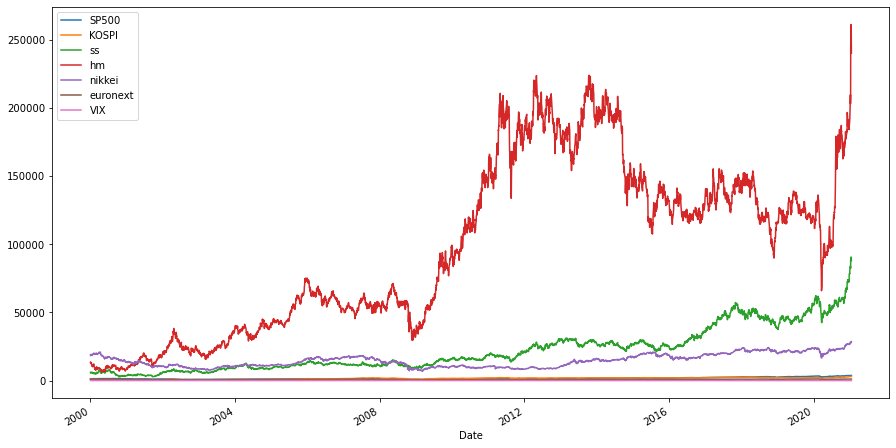

In [48]:
eqt.plot(figsize=(15, 8))
plt.show()

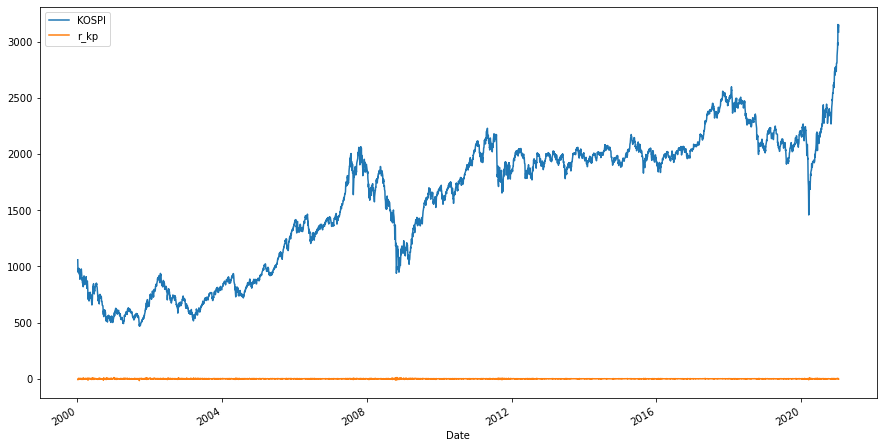

In [49]:
pr[['KOSPI', 'r_kp']].plot(figsize=(15, 8))
plt.show()

### 동조현상
- 미국 S&P500 주가수준 - 주가수익률 - VIX 동조(군집화)

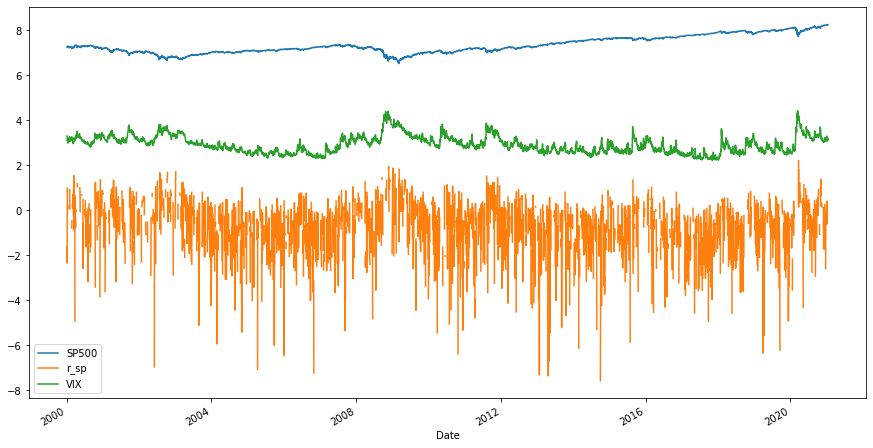

In [54]:
pr[['SP500', 'r_sp', 'VIX']].apply(np.log).plot(figsize=(15, 8))
plt.show()

## 기초 통계
Ramdom variable 4가지 moment

- 평균(Mean)
- 분산(Variance)
- 왜도(Skewness)
- 첨도(Kurtosis)

### 인덱스보다 개별 주식 변동폭 큼
- 위험 낮추기 위해 인덱스 쪽으로 포트폴리오를 구성
- 리스크 큰 만큼 수익률도 높음

In [56]:
rtn.describe()

,r_sp,r_kp,r_ss,r_hm,r_nk,r_ux,r_vx
count,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000
mean,0.020960,0.022630,0.056441,0.060850,0.008591,0.003385,-0.002202
std,1.320288,1.586401,2.408233,2.871622,1.566883,1.410276,7.390751
min,-12.765220,-16.115370,-17.092181,-35.231762,-12.111020,-12.751740,-49.640542
25%,-0.489164,-0.605780,-1.168909,-1.338476,-0.742104,-0.629279,-4.058521
50%,0.068224,0.077794,0.000000,0.000000,0.042502,0.059182,-0.566360
75%,0.604351,0.764576,1.274544,1.429695,0.848074,0.679651,3.443052
max,10.423562,11.284352,18.550121,19.695322,13.234592,12.378520,76.824503


### Skewness
- 일반적으로 stock return에 대해서는 negative skewness를 나타냄
- 개별 주식 또는 인덱스에서는 상승 구간 많을 경우 skewness가 positive
- kurtosis > 3
    - excess kurtosis
    - leptokurtic

In [62]:
stats = rtn.describe()
stats.loc['var'] = rtn.var().tolist()
stats.loc["skew"] = rtn.skew().tolist()
stats.loc['kurt'] = rtn.kurtosis().tolist()

stats.apply(lambda x: round(x, 3))

,r_sp,r_kp,r_ss,r_hm,r_nk,r_ux,r_vx
count,4726.000,4726.000,4726.000,4726.000,4726.000,4726.000,4726.000
mean,0.021,0.023,0.056,0.061,0.009,0.003,-0.002
std,1.320,1.586,2.408,2.872,1.567,1.410,7.391
min,-12.765,-16.115,-17.092,-35.232,-12.111,-12.752,-49.641
25%,-0.489,-0.606,-1.169,-1.338,-0.742,-0.629,-4.059
50%,0.068,0.078,0.000,0.000,0.043,0.059,-0.566
75%,0.604,0.765,1.275,1.430,0.848,0.680,3.443
max,10.424,11.284,18.550,19.695,13.235,12.379,76.825
var,1.743,2.517,5.800,8.246,2.455,1.989,54.623
skew,-0.450,-0.606,0.050,-0.345,-0.455,-0.103,0.979


## 히스토그램
상관관계 > 확률밀도함수 표본을 파악하기 위한 수단
- 가격의 히스토그램
    - 대부분 봉우리가 여러 개
    - non-stationary
    - 통계 모형을 통해 분석 불가능
   
### 상관관계
- Finance market에서 공분산과 상관관계는 매우 중요
- 숫자로 출력 가능 -> 전체적인 파악이 힘들다
    - Seaborn의 heatmap 기능을 이용하여 상관관계 시각화

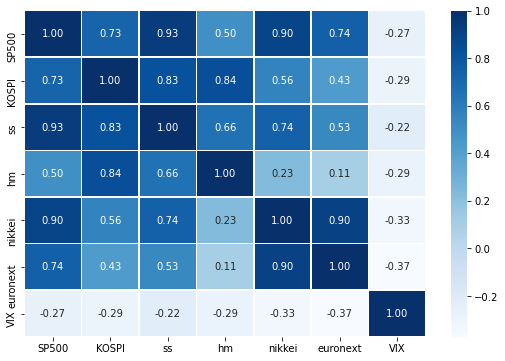

In [79]:
plt.figure(figsize=(9,6))
sns.heatmap(eqt.corr(), annot=True, fmt='.2f', cmap='Blues', linewidths=.5)
plt.show()

### 수익률의 히스토그램
- 표본분포함수가 normal 분포와 비슷한 형태 (봉우리 1개)
- stationary에 가까운 움직임을 시각적으로 파악
- seaborn pairplot
    - 상관관계의 전체적인 패턴 시각화

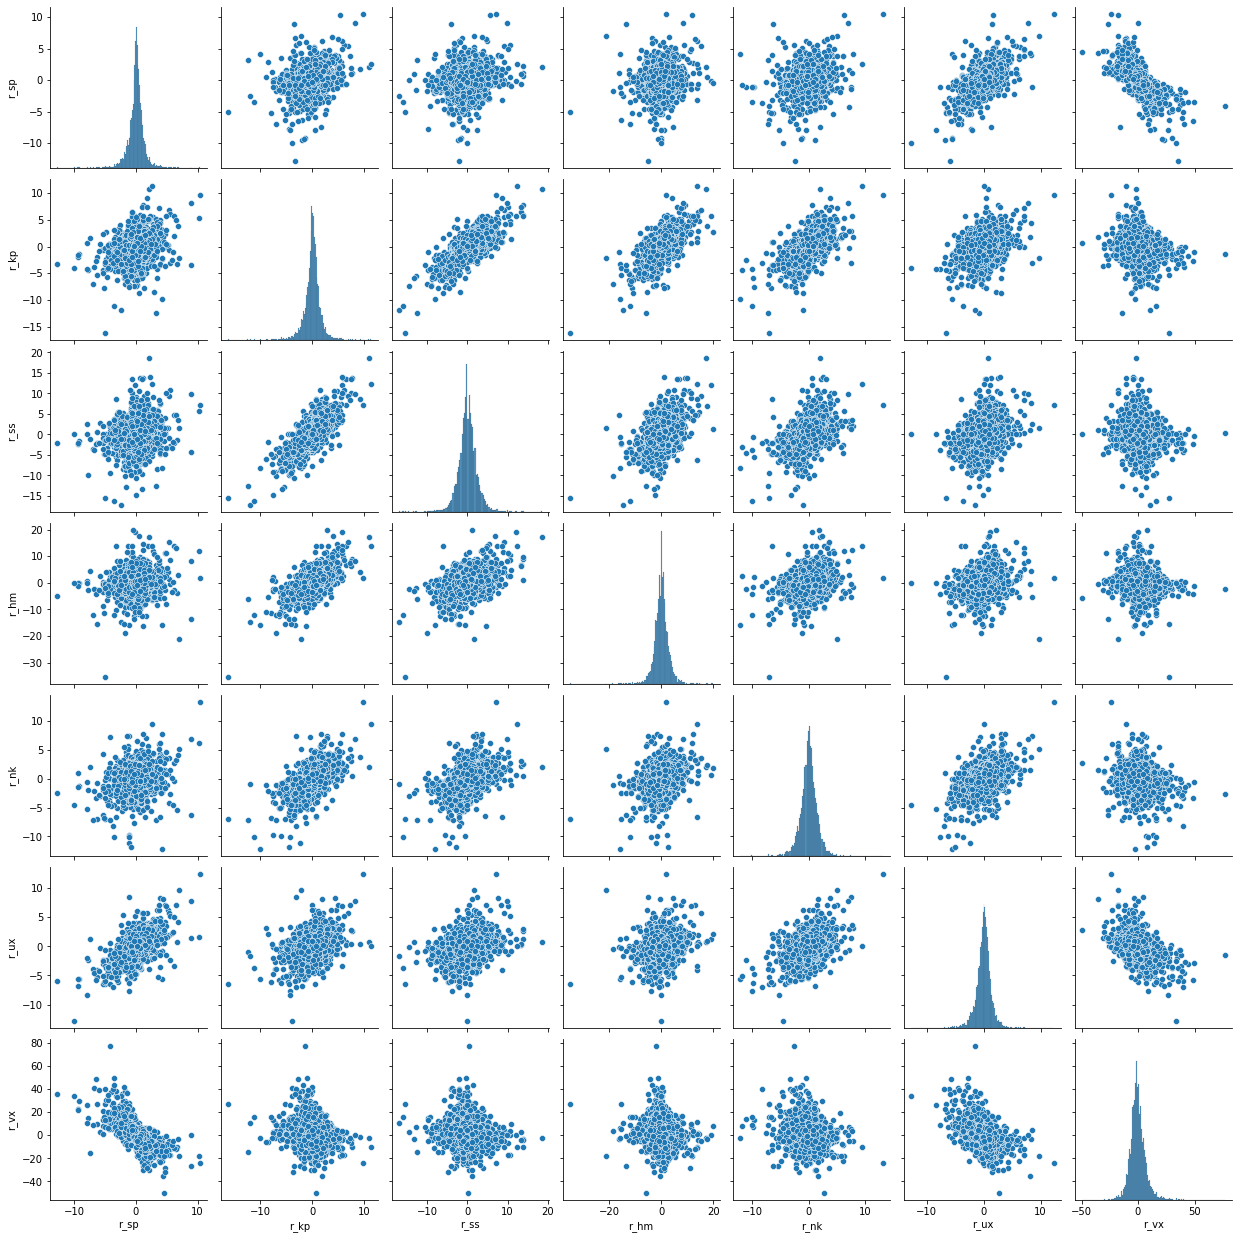

In [76]:
sns.pairplot(rtn)